# Project: Investigating a Movie Database Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, a database of movies taken from The Movie Database (TMDb) will be investigated. Based on this data, it should be interesting to investigate how well the success of a film could be predicted by certain characteristics that could be determined before the release of the film. These relationships could be of interest to various stakeholders, such as studio executives, cinema chain operators, public investors, etc.

For this analysis, the following questions are explored:
<ol>
    <li><a href="#explore1">How has movie profitability changed in the past few decades? Are films becoming more profitable?<a></li>
    <li><a href="#explore2">What factors could be potentially used to predict the profitablity of a movie?</a> Particularly:
        <ul>
            <li><a href="#explore2.1">2.1 Are top production companies more likely to produce profitable companies compared to average?</a></li>
            <li><a href="#explore2.2">2.2 Do more prolific production companies then to produce more profitable films on average?</a></li>
            <li><a href="#explore2.3">2.3 Is there a relationship between the budget of a film and its profitability?<a></li>
            <li><a href="#explore2.4">2.4 Is there a relationship between the genre of a film and its profitability?</a></li>
            <li><a href="#explore2.5">2.5 Is there a relationship between a movie's budget size and its production company's prolificness?</a></li>
        </ul>
    </li>
</ol>

In [1]:
# Import packages and global setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

# Note: Jupyter Notebook created using Monokai dark theme from JupyterThemes package
# The below will set up styles for plots for viewability on a dark background
from jupyterthemes import jtplot
jtplot.style('monokai')

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
Firstly, the database is loaded and inspected for the available data to see what data are available and what cleaning decisions should be taken:

In [2]:
df = pd.read_csv('tmdb-movies.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Based on the columns available in the database, the information available is as follows:
<ul>
    <li><strong>id numbers</strong> of the movies, including 2 sets (id and imdb_id)</li>
    <li><strong>popularity score</strong> of the movie - the nature this information is not clear based on the database documentation so it is further explored below</li>
    <li><strong>monetary information</strong>, including budget and revenue, as well as adjusted budget and revenue to 2010 dollar level, according to the documentation</li>
    <li><strong>general information</strong>, including title, cast, website homepage, director, tagline, keywords, overview, genres, and production company</li>
    <li><strong>numerical information</strong> includes runtime</li>
    <li><strong>date information</strong> including release date and release year</li>
    <li><strong>voting information</strong> including number of votes and average vote score</li>
</ul>

Based on preliminary investigation of the properties, the following steps could be taken to clean up the data prior to analysis:
<ol>
    <li><strong>Exclude the IMBD ID column</strong> as it is not relevant to analysis and the TMDb ID should be sufficient</li>
    <li><strong>Exclude homepage, tagline, keywords, and overview columns</strong> as they are not relevant to the planned analysis. (While statistical analysis in the tagline, overview and keywords would be interesting, it may be too complex for the current scope. Additionally, keywords appear to be user-generated and highly subjective, therefore the quality of the information for the purpose of statistical analysis may be low.) Film titles could also be removed as it is not relevant to the analysis but it will be kept for ease of identification of films during the analysis.</li> 
    <li><strong>The cast, genres and production house columns have multiple entries per movie</strong> separated by the pipe character. The entries should be split into separate rows if they are to be analysed</li>
    <li>As the goal of the analysis is to predict a movie's performance before its release, the <strong>voting information will be excluded</strong> as such information are generated by viewers after the films' releases and therefore not relevant</li>
    <li><strong>The release date column does not appear to be a valid date format</strong> recognised by Pandas and should be converted accordingly</li>
    <li><strong>Group movies by assigning to bins based on release year</strong></li>
    <li><strong>Calculate profitability of movies</strong> based on reported revenue vs budget</li>
</ol>

Next, the descriptive statistics of the data is viewed to make further inferences on the data:

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the descriptive statistics, further findings are made as follows:
<ul>
    <li>The release year ranges from 1960 to 2015. This implies the data includes films released up to 2015. However, the default zeroth year in many computer date formats is 1960, so it is possible that some entries marked with 1960 are missing data. This will be further explored below</li>
    <li>Data in the budget, revenue, and runtime have minimum value of 0. These are likely to be missing values which will need to be cleaned</li>
</ul>
    
Next, to determine nature of popularity score, the items with the highest popularities are investigated:

In [5]:
df.sort_values('popularity',ascending=False)[['popularity','original_title','release_year']].head(10)

,popularity,original_title,release_year
0,32.985763,Jurassic World,2015
1,28.419936,Mad Max: Fury Road,2015
629,24.949134,Interstellar,2014
630,14.311205,Guardians of the Galaxy,2014
2,13.112507,Insurgent,2015
631,12.971027,Captain America: The Winter Soldier,2014
1329,12.037933,Star Wars,1977
632,11.422751,John Wick,2014
3,11.173104,Star Wars: The Force Awakens,2015
633,10.739009,The Hunger Games: Mockingjay - Part 1,2014


Based on the top-ranked popularity items, they mainly appear to be the latest releases, implying they represent the popularity of the films at the time the database was retrived in 2015. The oldest film in the top popularity list is the original Star Wars released in 1977. This is most likely due to the recent release of Star Wars: The Force Awakens at the time, which was the first Star Wars sequel released in 10 years, leading to renewed interest in the original film.

Since the popularity information is a snapshot of popularity as at 2015, it is not relevant information for the purpose of this analysis for most of the movies in this database and thus will be removed.

Next, the data is checked for duplicated items. To potentially capture the most duplicates, the id column, which should be unique to each film, is checked:

In [6]:
df[df['id'].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


One duplicate row is identified for the movie TEKKEN which will therefore be removed in the cleaning stage.

To double-check for duplicates, another check is performed to filter for any entries with the same title, same director and same release year. This combination is selected as some directors remake their own short films into feature-length films while using the same title, but usually in a different year.

In [7]:
df_title_year = pd.DataFrame(df, columns=['original_title', 'director', 'release_year'])
df_title_year[df_title_year.duplicated()]

,original_title,director,release_year
2090,TEKKEN,Dwight H. Little,2010


Based on these filters, it appears that TEKKEN is indeed the only duplicate item.

Next, movies marked as released in 1960 are checked if they are valid entries or if they are actually missing data:

In [8]:
df.query('release_year == 1960').sort_values('release_date')[
    ['original_title', 'release_date', 'release_year']].head(10)

,original_title,release_date,release_year
10150,The Unforgiven,1/1/60,1960
10152,The Brides of Dracula,1/1/60,1960
10159,Midnight Lace,10/13/60,1960
10142,The Magnificent Seven,10/23/60,1960
10161,The Alamo,10/24/60,1960
10143,Spartacus,10/6/60,1960
10145,Let's Make Love,10/7/60,1960
10170,Cinderfella,12/18/60,1960
10157,Flaming Star,12/20/60,1960
10148,Swiss Family Robinson,12/21/60,1960


Based on the above sample and internet research, it appears that movies marked as released in 1960 are indeed released in 1960. However, there is a potential issue in the case that the release date of 1st January is not the actual release date of the movie but indicating missing actual release date data (The Unforgiven was released in April 1960 and The Brides of Dracula was released in July 1960). 

Thus, it is possible that other movies marked as released in 1st Jan in other years also contain missing release date data, which would be problematic if analysis based on release schedule is performed.

Since part of the analysis will be based on changes in trends over time, a plot of movie count by year is checked to ensure there aren't unusal distribution in the release years which could potentially affect analysis:

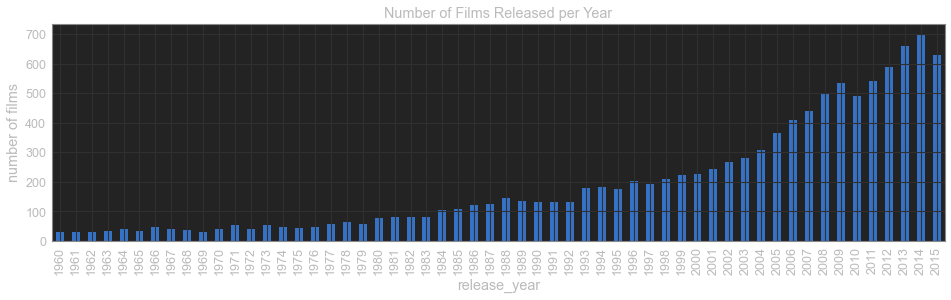

In [9]:
ax = df.groupby('release_year').count()['id'].plot(kind='bar', figsize=(16,4));
ax.set_ylabel('number of films')
ax.set_title('Number of Films Released per Year')
plt.show()

Based on the above it can be seen that the number of movies released each year has an upward trend which is expected as the movie industry grows, with some year-on-year decreases which could have been explained by industry or economic trends (for example, decrease in number of movies released between 2008 and 2009 could have been caused by the Subprime Crisis of 2008 affecting financing and demand for movies).

### Data Cleaning

In this section, the following data cleaning operations are performed:
<ol>
    <li>Remove duplicate items</li>
    <li>Delete unnecessary columns</li>
    <li>Convert date format</li>
    <li>Separate release years into bins</li>
    <li>Calculate profitability values</li>
    <li>Clean erroreous data</li>
    <li>Seperate production companies to new rows</li>
    <li>Separate genres to new rows</li>
</ol>

#### Remove Duplicates

The duplicate identified is removed and data is checked that there are no remaining duplicates:

In [10]:
df_clean1 = df.copy()
df_clean1 = df_clean1.drop_duplicates()
df_clean1['id'].duplicated().sum()

0

#### Delete Unnecessary Columns

Firstly, unnecessary columns, as discussed in the previous section, are dropped:

In [11]:
df_clean1.drop(['imdb_id', 'popularity', 'homepage', 'tagline', 'keywords',
                'overview', 'vote_count', 'vote_average', ], axis=1, inplace=True)

#### Convert Date Format

_Note: Release day and month information not used in analysis but cleaning exercise done for practice and potential further future analysis_

The date format for release date converted to data type recognised by Pandas:

In [12]:
# Splits date using "/" as separator and merge into format understanable by to_datetime() function
df_rd = df['release_date'].str.split(pat='/', expand=True)
df_rd['merge'] = ''

for i in df_rd.index:
    # Add prefix to year as to_datetime() function assumes 2-digit years are 20xx
    if int(df_rd[2][i]) >= 60:
        year_prefix = '19'
    else:
        year_prefix = '20'
    df_rd['merge'][i] = year_prefix + df_rd[2][i] + \
        '-' + df_rd[0][i] + '-' + df_rd[1][i]

df_clean1['release_date'] = pd.to_datetime(df_rd['merge'])

As an additional check of data validity, check if year in release_date column matches release_year column:

In [13]:
check = pd.DatetimeIndex(df_clean1['release_date']).year != df_clean1['release_year']
check.any()

False

This confirms that the release year column's information does match release dates

#### Seperate Release Years to Bins

Movies will be compared decade-by-decade to analyse changes over time in a more general manner. Thus, the data will be marked with decade bins based on the decade it was released in:

In [14]:
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df_clean1['decade'] = pd.cut(
    df_clean1['release_year'], bin_edges, labels=bin_names)
df_clean1.groupby('decade').count()['release_year']

decade
1960s     371
1970s     545
1980s    1117
1990s    1860
2000s    3824
2010s    3116
Name: release_year, dtype: int64

#### Calculate Profitability

Next, a "profitablility" column is added calculated by percentage of revenue divided by budget minus 1 (proportion of revenue exceeding budget). If either budget or revenue is 0 (missing data), profitability is left blank

In [15]:
df_profit = df_clean1.copy()

# Where data is missing, NaN is entered and then profitability rows containing NaN are deleted
df_profit['profitability'] = np.where((df_profit['revenue'] > 0) & (df_profit['budget'] > 0),
                                      df_profit['revenue'].div(df_profit['budget']).sub(1), np.nan)
df_profit = df_profit[~df_profit['profitability'].isna()]

df_profit[['original_title', 'profitability']].head()

,original_title,profitability
0,Jurassic World,9.090192
1,Mad Max: Fury Road,1.522909
2,Insurgent,1.683984
3,Star Wars: The Force Awakens,9.340891
4,Furious 7,6.927628


#### Clean Errorneous Data

Additionally, the data is checked for any potential errorneous information:

In [16]:
df_profit[['budget', 'revenue', 'profitability']].describe()

,budget,revenue,profitability
count,3.854000e+03,3.854000e+03,3.854000e+03
mean,3.720370e+07,1.076866e+08,2.970412e+02
std,4.220822e+07,1.765393e+08,1.644256e+04
min,1.000000e+00,2.000000e+00,-9.999998e-01
25%,1.000000e+07,1.360003e+07,-1.234118e-01
50%,2.400000e+07,4.480000e+07,1.119690e+00
75%,5.000000e+07,1.242125e+08,3.210444e+00
max,4.250000e+08,2.781506e+09,1.018618e+06


It can be seen that there are some unlikely values in profitability column, such as maxmimum profitability of over 1000000%. To  identify the potential issues, the data is sorted by profitability, examining the head and tail as follows:

In [17]:
df_profit.sort_values('profitability', ascending=False)[
    ['budget', 'revenue', 'original_title', 'profitability']]

,budget,revenue,original_title,profitability
10495,113,115103979,"The Karate Kid, Part II",1.018618e+06
6179,114,6700000,Into the Night,5.877093e+04
3608,93,2500000,From Prada to Nada,2.688072e+04
7447,15000,193355800,Paranormal Activity,1.288939e+04
2449,25000,248000000,The Blair Witch Project,9.919000e+03
...,...,...,...,...
7158,23000000,12,Chasing Liberty,-9.999995e-01
8523,15000000,5,Bordello of Blood,-9.999997e-01
5067,6000000,2,Shattered Glass,-9.999997e-01
8142,6000000,2,Mallrats,-9.999997e-01


Based on the above, it appears that some data including both the budget and revenue were errorneously entered. For example, the first 3 films budget values are too small to be in USD, and similarly for the bottom movies with very low revenues. These entries will be assumed to be errorneous and will be excluded from analysis.

For simplicity, it will be assumed that any entries in the budget and revenue below 10,000 are errorneous entries, and thus any films with budget or revenue listed as less than 10,000 will be excluded:

In [18]:
# Create new DataFrame where entries assumed to be errenous are excluded
df_profit_clean = df_profit.copy()

# Mark errenous entries as to drop and drop such rows accordingly
df_profit_clean['to_drop'] = np.where((df_profit_clean['budget'] < 10000) | (
    df_profit_clean['revenue'] < 10000), 'drop', 'keep')
df_profit_clean = df_profit_clean[df_profit_clean['to_drop'] == 'keep']
df_profit_clean.drop('to_drop', axis=1, inplace=True)

Furthermore, as the profitability data is significantly skewed towards large values, a logarithmic transformation of the profitability is applied. Since logarithmic cannot be applied on zero or negative value, unprofitable films with zero or negative profitability will be excluded:

In [19]:
# Create separate DataFrame that only includes films with positive profitability
df_profit_log = df_profit_clean.copy()
df_profit_log = df_profit_log[df_profit_log['profitability'] > 0]

# Create new column where the base-10 logarithm of the profitability value is stored
df_profit_log['log_profit'] = np.log10(df_profit_log['profitability'])
df_profit_log.sort_values('profitability', ascending=False)[
    ['budget', 'revenue', 'original_title', 'profitability', 'log_profit']]

,budget,revenue,original_title,profitability,log_profit
7447,15000,193355800,Paranormal Activity,12889.386667,4.110232
2449,25000,248000000,The Blair Witch Project,9919.000000,3.996468
1354,10000,7000000,Eraserhead,699.000000,2.844477
7277,12000,6000000,Pink Flamingos,499.000000,2.698101
7178,65000,28575078,Super Size Me,438.616585,2.642085
...,...,...,...,...,...
8464,100000000,100138851,The Hunchback of Notre Dame,0.001389,-2.857451
5291,50000000,50068310,Absolute Power,0.001366,-2.864486
5577,60000000,60052138,Beautiful Creatures,0.000869,-3.060997
1492,100000000,100086793,Where the Wild Things Are,0.000868,-3.061515


In [20]:
df_profit_log[['budget','revenue','profitability','log_profit']].describe()

,budget,revenue,profitability,log_profit
count,2.758000e+03,2.758000e+03,2758.000000,2758.000000
mean,4.056720e+07,1.445150e+08,14.312268,0.279960
std,4.560837e+07,1.965244e+08,310.548724,0.646570
min,1.000000e+04,1.012360e+05,0.000732,-3.135269
25%,1.000000e+07,3.340000e+07,0.899507,-0.045995
50%,2.500000e+07,7.837497e+07,2.024357,0.306287
75%,5.500000e+07,1.727321e+08,4.405094,0.643955
max,3.800000e+08,2.781506e+09,12889.386667,4.110232


The range of profitability value appears to be more reasonable after the cleaning operation.

In order to demonstrate why the log values of profitability will be used when exploring profitability distribution, a comparative boxplot between quartile ranges calculated from log and raw values is plotted as follows:

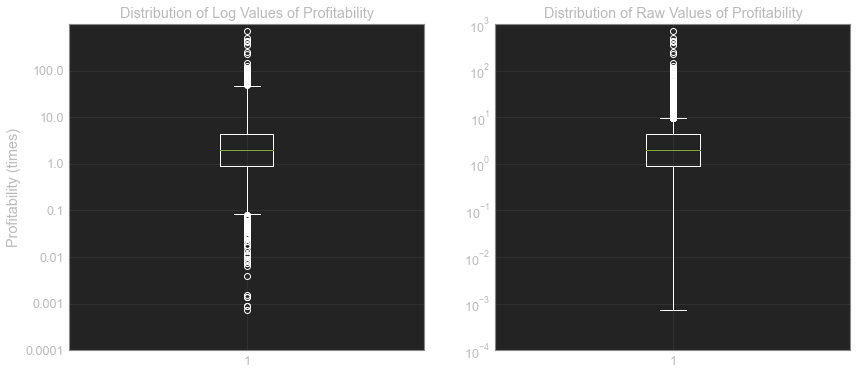

In [21]:
fig = plt.figure(figsize=(14, 6))

# Outlier colour can't be set using plt.setp() so need to be set separately
flierprops = dict(markeredgecolor='white')

ax = plt.subplot(1, 2, 1)
bp = ax.boxplot(df_profit_log['log_profit'], flierprops=flierprops)
# Set plot colours to white for dark background (as it is not automatically set by )
for key in ['boxes', 'whiskers', 'caps']:
    plt.setp(bp[key], color='white')
ax.set_ylim([-4, 3])
ax.set_yticks(np.arange(-4, 3))
# Convert axis labels from log to raw values
ax.set_yticklabels(10.0**np.arange(-4, 3))
ax.set_ylabel('Profitability (times)')
ax.set_title('Distribution of Log Values of Profitability')

ax = plt.subplot(1, 2, 2)
bp = ax.boxplot(df_profit_log['profitability'], flierprops=flierprops)
for key in ['boxes', 'whiskers', 'caps']:
    plt.setp(bp[key], color='white')
# Set axis range same as first chart
ax.set_ylim([10**-4, 10**3])
ax.set_yscale('log')
ax.set_title('Distribution of Raw Values of Profitability')

plt.show()

As seen in the above comparative box plots, while the median and upper and lower quartile values are the same regardless of the method, the whisker range (which represents 1.5x the inter-quartile range) of the profitability values in log scale more accurately captures the range of profitability values, while the raw values plot shows excessive amount outliers in the upper range.

In [22]:
df_profit_log.groupby('decade').count()['profitability']

decade
1960s      67
1970s     138
1980s     333
1990s     549
2000s    1048
2010s     618
Name: profitability, dtype: int64

After filtering, there appears to still be sufficient data points for analysis.

#### Separate Production Companies to New Rows

In order to perform the analysis related to production companies, each company in each movie's entry is separated into new rows using the explode function:

In [23]:
df_prod_com = df_profit_log.copy()
df_prod_com['production_companies'] = df_prod_com['production_companies'].str.split(
    pat='|')
df_prod_com = df_prod_com.explode('production_companies')

In [24]:
df_prod_com['production_companies'].nunique()

2397

In [25]:
df_prod_com.groupby('production_companies')[
    'profitability'].count().sort_values(ascending=False)

production_companies
Universal Pictures                        268
Warner Bros.                              250
Paramount Pictures                        218
Twentieth Century Fox Film Corporation    173
Columbia Pictures                         150
                                         ... 
Monkey Dance Productions                    1
Monolith Pictures (III)                     1
Monophonic Inc.                             1
Moonrise                                    1
"DIA" Productions GmbH & Co. KG             1
Name: profitability, Length: 2397, dtype: int64

There are 2,397 unique production companies based on the names. Counting by the number of movies which have valid profitability figures, Universal Pictures is the most prolific studio with 268 movies.

#### Separate Genres to New Rows
Similarly, each gene in each movie's entry is separated into new rows using the explode function:

In [26]:
df_genres = df_profit_log.copy()
df_genres['genres'] = df_genres['genres'].str.split(pat='|')
df_genres = df_genres.explode('genres')

In [27]:
df_genres['genres'].nunique()

20

In [28]:
df_genres.groupby('genres')['profitability'].count()

genres
Action              782
Adventure           572
Animation           162
Comedy              999
Crime               463
Documentary          26
Drama              1164
Family              338
Fantasy             293
Foreign               4
History              94
Horror              340
Music                92
Mystery             222
Romance             468
Science Fiction     381
TV Movie              1
Thriller            831
War                  89
Western              33
Name: profitability, dtype: int64

There are 20 unique genres, with the most common genre being Drama with 1,164 movies

<a id='eda'></a>
## Exploratory Data Analysis

<a id='explore1'></a>
### 1. How has movie profitability changed in the past few decades? 

For this question, the distribution of profitability grouped into decades to see how movies' profitabilities have changed from decade to decade over the anaysis period. It should be noted that, as the data is available from 1960 to 2015, the 2010s decade only consists of data from 5 years as opposed to 10 years:

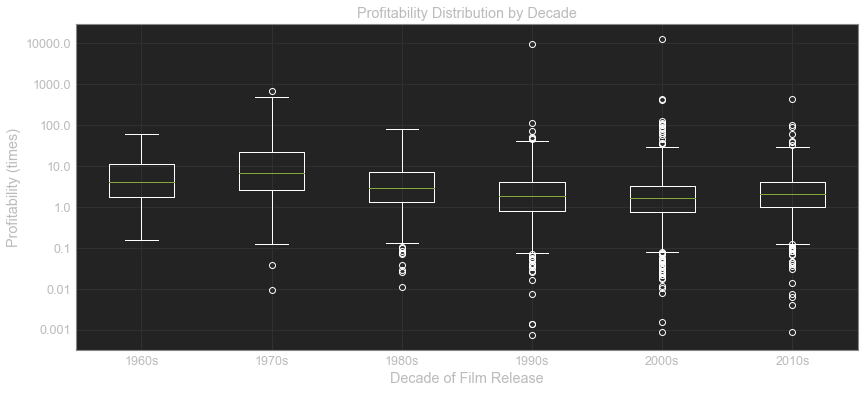

In [29]:
# Define function for creating profitability box plots as they will be used multiple times later
def profit_box(df_profit_box, category='decade', categoryb='log_profit', bin_list=bin_names, vert=True):
    ax = plt.subplot(1, 1, 1)
    flierprops = dict(markeredgecolor='white')
    box_data = []

    for i, j in enumerate(bin_list):
        query_string = category + ' == "' + j + '"'
        box_data.append(df_profit_box.query(query_string)[categoryb])

    bp = ax.boxplot(box_data, flierprops=flierprops, vert=vert)

    for key in ['boxes', 'whiskers', 'caps']:
        plt.setp(bp[key], color='white')

    return ax


fig = plt.figure(figsize=(14, 6))

ax = profit_box(df_profit_log)

ax.set_yticks(np.arange(-3, 5))
ax.set_yticklabels(10.0**np.arange(-3, 5))
ax.set_xticklabels(bin_names)
ax.set_ylabel('Profitability (times)')
ax.set_xlabel('Decade of Film Release')
ax.set_title('Profitability Distribution by Decade')

plt.show()

In [30]:
df_profit_log.groupby('decade')['profitability'].describe()

,count,mean,std,min,25%,50%,75%,max
decade,,,,,,,,
1960s,67.0,9.691868,13.736819,0.159439,1.812696,4.000000,11.093030,61.000000
1970s,138.0,31.061112,84.623936,0.009237,2.614285,6.951785,21.751982,699.000000
1980s,333.0,6.137919,10.156913,0.010920,1.357627,3.000000,7.300000,83.000000
1990s,549.0,21.909006,423.241038,0.000732,0.811669,1.873440,4.061297,9919.000000
2000s,1048.0,16.749288,398.567337,0.000868,0.750867,1.659483,3.329689,12889.386667
2010s,618.0,4.626884,18.550400,0.000869,1.007133,2.076051,4.034548,425.644100


Based on the above box plot and descriptive statistics, it can be seen that movie profitability rose from the 1960s with a median profit margin of 400% to over 695% in the 1970s. In the 1980s, 1990s, and 2000s, the median margin declined to 300%, 188%, and 166%, respectively. In the 2010s, average profit margin increased to 208%.

While the 1970s appeared to be the most profitable year for movies, it also appears to be the most risky with the highest standard deviation in profitability.

As the above analysis only takes into account profitable films, the average profitability of films is overstated. However, we can see in the analysis below which includes low and unprofitable films that the decade-by-decade trend is similar to the analysis which only includes profitable films:

C:\Users\chron\anaconda3\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


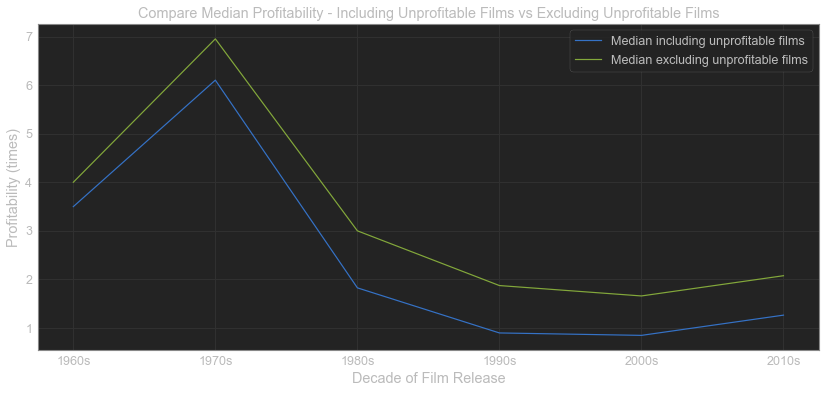

In [31]:
# Create DataFrame with decade-by-decade median profitabilities of all movies vs only profitable movies 
df_compare_avg_profit = pd.DataFrame(
    df_profit_clean.groupby('decade')['profitability'].median())
df_compare_avg_profit.rename(
    columns={'profitability': 'median_inc_unprofit'}, inplace=True)
df_compare_avg_profit['median_profit_only'] = df_profit_log.groupby('decade')[
    'profitability'].median()

fig = plt.figure(figsize=(14, 6))

ax = plt.subplot(1, 1, 1)
ax.plot(df_compare_avg_profit['median_inc_unprofit'],
        label='Median including unprofitable films')
ax.plot(df_compare_avg_profit['median_profit_only'],
        label='Median excluding unprofitable films')
ax.set_ylabel('Profitability (times)')
ax.set_xlabel('Decade of Film Release')
ax.set_title(
    'Compare Median Profitability - Including Unprofitable Films vs Excluding Unprofitable Films')
ax.legend()

plt.show()

# Note to reviewer: running this cell produces a FutureWarning error which I have not been 
# able to identify the reason. Would appreciate any guidance.

Difference in average profitability including and excluding unprofitable films ranges from approx. 50%-100%. The lowest gap being in the 1960s while the highest gap being in the 1980s.

<a id='explore2'></a>
### 2. What factors could be potentially used to predict the profitablity of a movie?
In the following section, several factors that may correlate to the profitability of a movie are explored:

<a id='explore2.1'></a>
#### 2.1 Are top production companies more likely to produce profitable companies compared to average?

Firstly, it will be explored whether the top 10 production companies are able to achieve on average high profitability and if this has changed over the decades. This is based on the hypothesis that experienced movie producers would be able to identify trends and preferences of consumers and thus be able to make more informed decisions regarding the movies they invest in in order to outperform the movie industry in general.

For this analysis, we will look at the 10 most profilic production companies, ranked by the number of movies it has produced over the analysis period, as well as their median average profitability:

In [32]:
# Calculate median profitability of all profitable films
med_all_profitable = df_profit_log['profitability'].median()
print('Median profitability of all profitable films:', med_all_profitable)


# Define function for returning a DataFrame which includes the number of films and median
# profitabilities based on a certain group, as this will be used again later
def num_and_median(df_prod_com, group='production_companies'):

    idx = pd.Int64Index(np.arange(0, df_prod_com[group].nunique()))
    # Generate column counting number of films based on available profitability data
    df_top_comp = pd.DataFrame(df_prod_com.groupby(group)[
                               'profitability'].count().sort_values(ascending=False)).reset_index()
    df_top_comp.rename(columns={'profitability': 'num_of_films'}, inplace=True)

    # Generate column calculating median of films based on available profitability data
    df_top_comp_med = pd.DataFrame(df_prod_com.groupby(group)[
                                   'profitability'].median())
    df_top_comp = pd.merge(df_top_comp, df_top_comp_med,
                           left_on=group, right_on=group)
    df_top_comp.rename(
        columns={'profitability': 'median_profit'}, inplace=True)

    return df_top_comp


# Crate DataFrame of number of films and median profitability grouped by each production company
df_top_comp = num_and_median(df_prod_com)
df_top_comp.head(10)

Median profitability of all profitable films: 2.0243568466666666


,production_companies,num_of_films,median_profit
0,Universal Pictures,268,2.345997
1,Warner Bros.,250,1.822642
2,Paramount Pictures,218,2.060885
3,Twentieth Century Fox Film Corporation,173,2.305797
4,Columbia Pictures,150,1.754584
5,New Line Cinema,124,2.258365
6,Walt Disney Pictures,104,1.992242
7,Relativity Media,85,1.454926
8,Touchstone Pictures,80,1.995606
9,Metro-Goldwyn-Mayer (MGM),79,1.875392


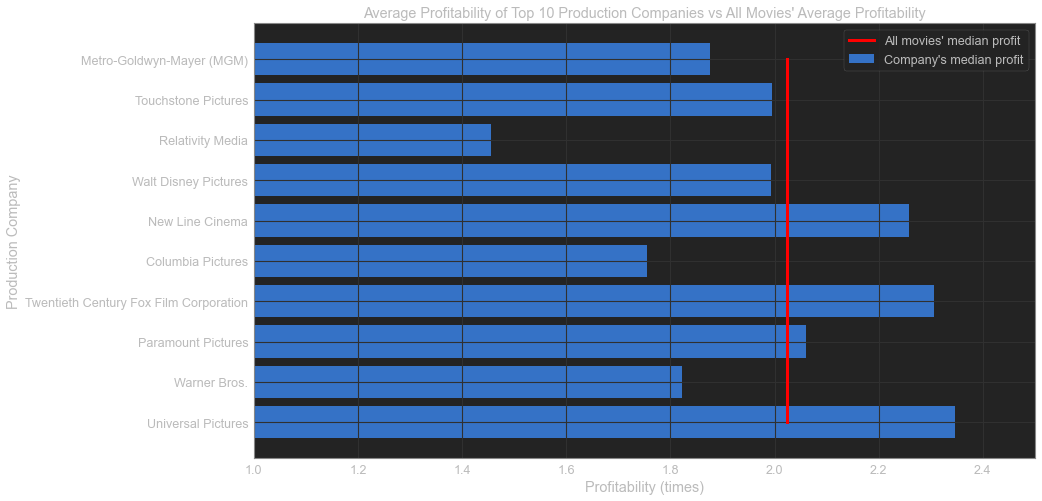

In [33]:
fig = plt.figure(figsize=(14, 8))

ax = plt.subplot(1, 1, 1)
ax.barh(np.arange(0, 10), df_top_comp.head(10)[
        'median_profit'], label='Company\'s median profit')
ax.set_yticks(np.arange(0, 10))
ax.set_yticklabels(df_top_comp.head(10)['production_companies'])
ax.set_xlim([1, 2.5])
ax.plot(np.full(10, med_all_profitable), np.arange(0, 10),
        color='red', label='All movies\' median profit', linewidth=3)
ax.legend()
ax.set_ylabel('Production Company')
ax.set_xlabel('Profitability (times)')
ax.set_title(
    'Average Profitability of Top 10 Production Companies vs All Movies\' Average Profitability')

plt.show()

Based on the result as shown in the chart above, it can be seen that, on average over the whole analysis period from 1960 to 2010, out of the top ten production companies, 4 are able to achieve higher profitabilities on their movies on average compared to the industry average, those being Universal Pictures, Paramount Pictures, Twentitieth Century Fox and New Line Cinema.

To take a closer look at how this has changed over the past few decades, the distribution of profitabilities for each decade is compared to the industry average for each of the top companies:

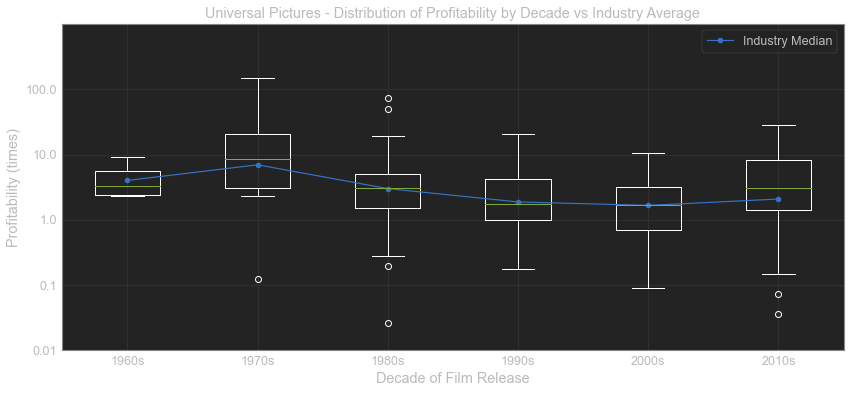

In [34]:
# Define fucntion to view decade-by-decade profitability distribution for each company
def profit_box_vs_med(company):

    query_string = 'production_companies == "' + company + '"'

    df_com_spec = pd.DataFrame(df_prod_com.query(query_string))

    fig = plt.figure(figsize=(14, 6))

    ax = profit_box(df_com_spec)
    ax.set_yticks(np.arange(-2, 3))
    ax.set_yticklabels(10.0**np.arange(-2, 3))
    ax.set_ylim([-2, 3])
    ax.set_xticklabels(bin_names)
    ax.plot(np.arange(1, 7), np.log10(
        df_compare_avg_profit['median_profit_only']), 'o-', label='Industry Median')
    ax.set_ylabel('Profitability (times)')
    ax.set_xlabel('Decade of Film Release')
    ax.set_title(
        company + ' - Distribution of Profitability by Decade vs Industry Average')
    ax.legend()

    plt.show()


profit_box_vs_med('Universal Pictures')

For Universal Pictures, it can be seen that the company outperformed the average in 1960s, underperformed in 1970s, while over 1980s to 2000s it has generally matched the industry average. However, in 2010s, it outperformed the industry average significantly.

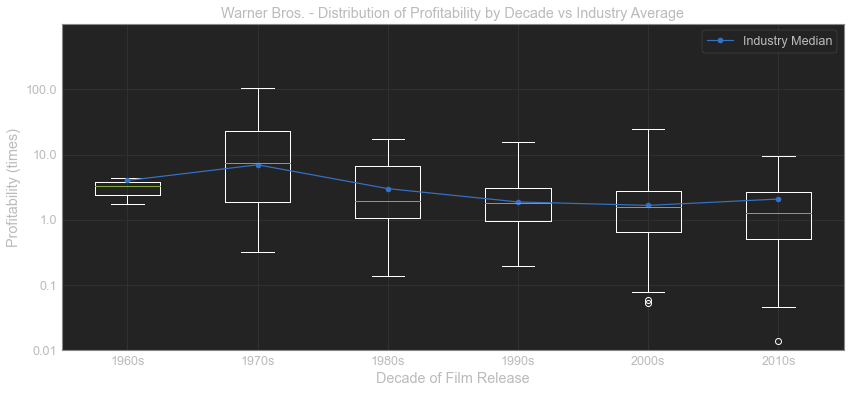

In [35]:
profit_box_vs_med('Warner Bros.')

For Warner Bros., the company outperformed the industry in 1960s, matched the average in 1990s and 2000s, but significantly underperformed in 1980s and 2010s.

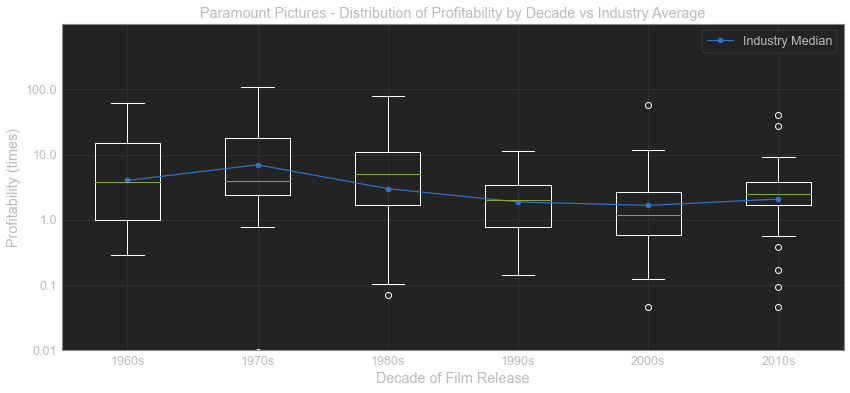

In [36]:
profit_box_vs_med('Paramount Pictures')

Paramount Pictures underperformed the market in 1970s and 2000s, but outperformed the industry significantly in 1980s, and also outperformed the market slightly in 2010s. In other decades it was close to industry average.

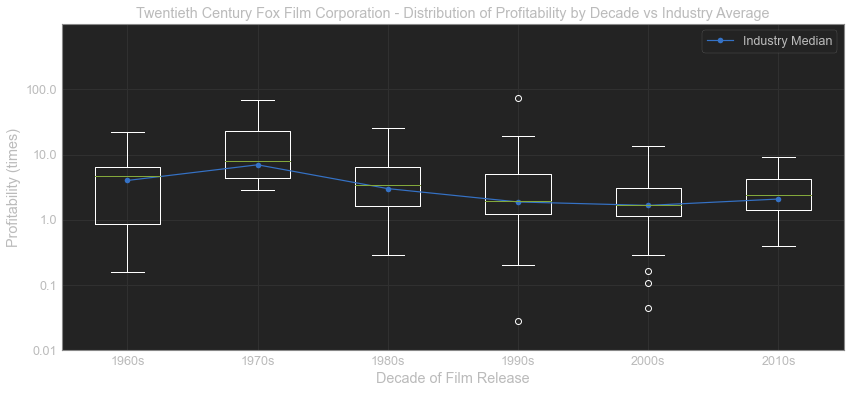

In [37]:
profit_box_vs_med('Twentieth Century Fox Film Corporation')

Twentieth Century Fox was close to the industry average in most periods, slightly underperforming the industry in 1970s and 1980s, and slightly overperforming the industry in 1960s and 2010s.

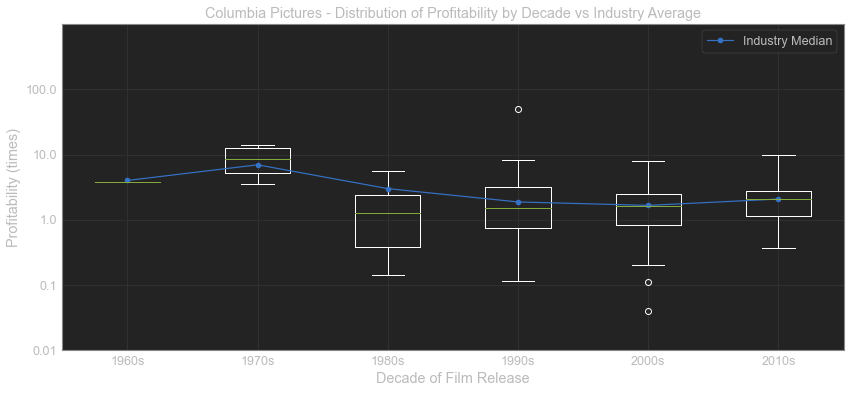

In [38]:
profit_box_vs_med('Columbia Pictures')

Columbia Pictures overperformed the industry in 1970s, but significantly underperformed in 1980s and 1990s. It matched the industry average performance in 2000s and 2010s. It only had 1 entry in 1960s.

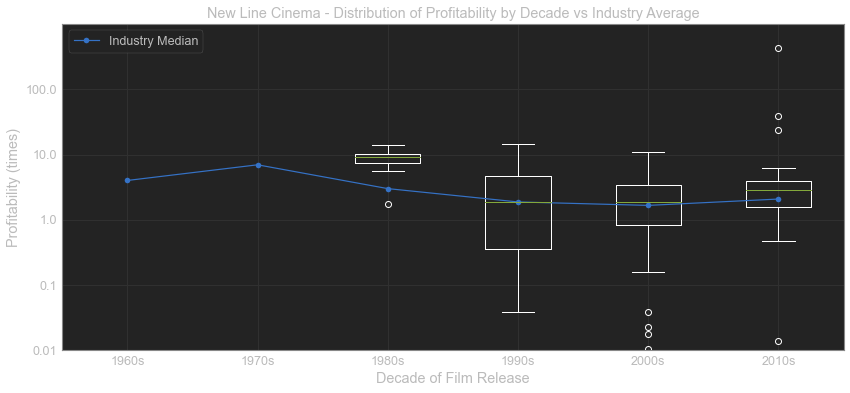

In [39]:
profit_box_vs_med('New Line Cinema')

For New Line Cinema, profitability in 1990s and 2000s are close to the industry average, and outperformed the industry in 2010s. In 1980s it outperformed the industry although the number of films appeared to be low based on the sample range. It had no data for 1960s and 1970s.

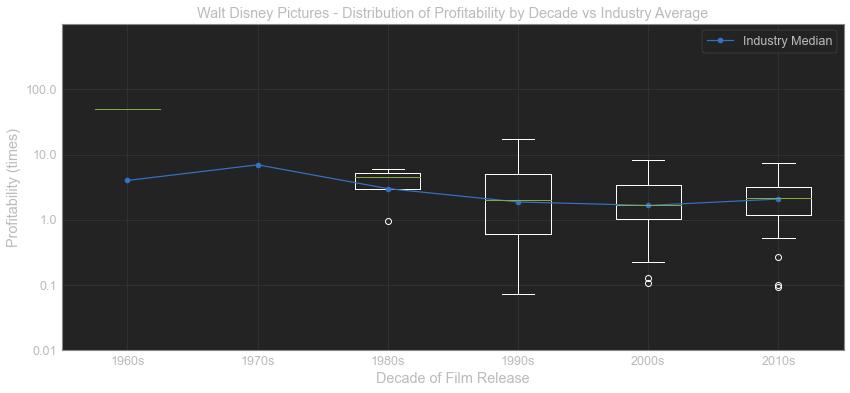

In [40]:
profit_box_vs_med('Walt Disney Pictures')

Walt Disney Pictures are close to the industry average in 1990s, 2000s and 2010s. It outperformed the industry average in 1980s but number of samples appeared to be low. It only had 1 entry in 1960s and no entry in 1970s.

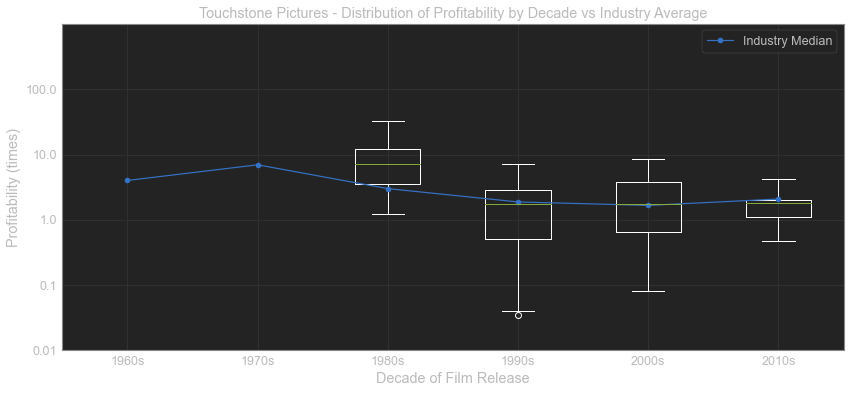

In [41]:
profit_box_vs_med('Touchstone Pictures')

Touchstone Pictures are close to the industry average in 1990s and 2000s. It overperformed the industry average significantly in 1980s but slightly underperformed in 2010s. It had no data for 1960s and 1970s.

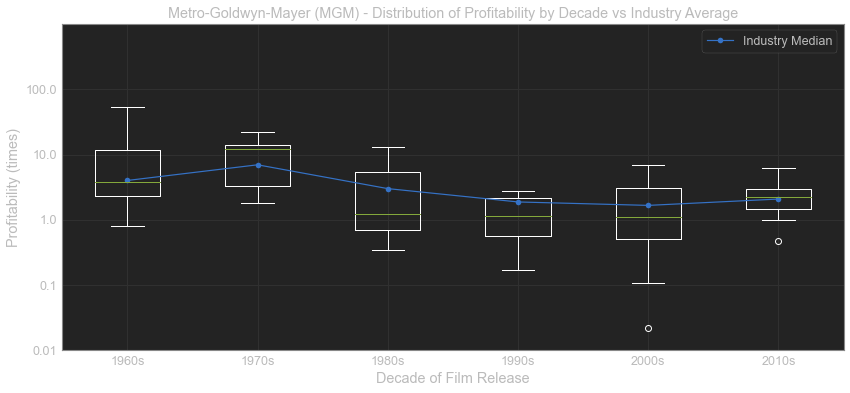

In [42]:
profit_box_vs_med('Metro-Goldwyn-Mayer (MGM)')

MGM underperformed the industry average significantly in 1980s, 1990s and 2000s. It was close to the average in 1960s and 2010s. In 1970s, it appeared to overperform significantly based on the median, but based on the inner-quartile range, it appeared to be close to the average.

Based on the above analyses, it appears that no companies are able to beat the profitability average consistently from decade to decade, but over a shorter period some companies do appear to be able to perform better on average than the industry, and vice versa.

This does not seem to support the hypothesis that top movie studios are able to beat the industry average consistently. The average performance over the entire duration shows that only 4 of the 10 major studios beat the industry on average, and decade-by-decade analysis shows that even such studios are not able to beat the industry average consistently over multiple decades.

For further analysis, we will focus on the latest 15 years of data (data from 2000s and 2010s) to explore if there are any characteristics that make certain companies able to produce more profitable movies on average than others. The latest 15 years is picked as it represents the most recent data while also allowing sufficient data points to make analysable trends.

In [43]:
df_prod_com_latest = pd.DataFrame(df_prod_com.query('release_year >= 2000'))

<a id='explore2.2'></a>
#### 2.2 Do more prolific production companies then to produce more profitable films on average?

After exploring the profitability of top companies, analysis is extended to all companies to address whether more prolific companies perform better on average than less prolific companies. For this question, a scatter plot of the median profitability of a studio against its prolificness (number of films it has produced) is generated to ascertain if there are any visible trends:

In [44]:
med_all_profitable_recent = df_profit_log.query('release_year >= 2000')['profitability'].median()
print('Median profitability of all profitable films from 2000-2015:', med_all_profitable_recent)

df_top_comp_latest = num_and_median(df_prod_com_latest)
df_top_comp_latest

Median profitability of all profitable films from 2000-2015: 1.7752045


,production_companies,num_of_films,median_profit
0,Universal Pictures,151,2.028088
1,Warner Bros.,144,1.514062
2,Paramount Pictures,107,1.659325
3,Columbia Pictures,105,1.740564
4,Twentieth Century Fox Film Corporation,99,1.893624
...,...,...,...
1766,Ministry of Propaganda Films,1,34.860900
1767,Mirabai Films,1,0.678236
1768,Miracle Pictures,1,1.171429
1769,Mirage Studios,1,1.812029


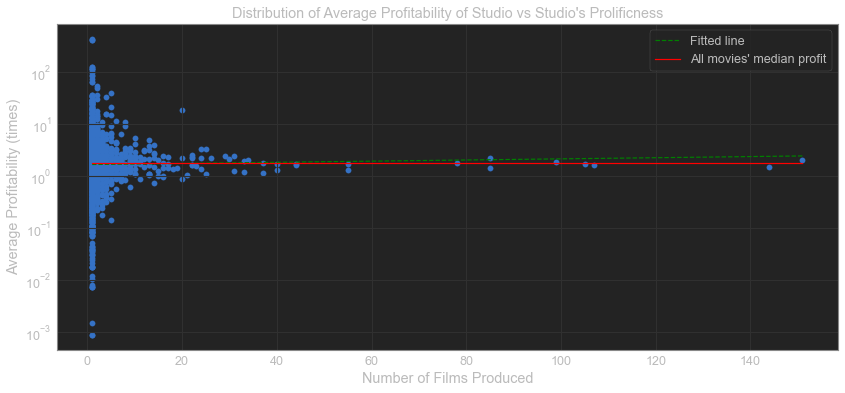

In [45]:
fig = plt.figure(figsize=(14, 6))

ax = plt.subplot(1, 1, 1)

def logy_scatter_trend(x, y, pointcolor='#3572c6', linecolor='green', label='Fitted line'):

    ax.scatter(x, y, color=pointcolor)
    ax.set_yscale('log')

    # Calculate and plot "linear" trend line on log-profit vs prolificness
    p = np.poly1d(np.polyfit(x, np.log10(y), 1))
    plt.plot(x, 10**p(x), color=linecolor, linestyle='dashed', label=label)

logy_scatter_trend(df_top_comp_latest['num_of_films'], 
                   df_top_comp_latest['median_profit'])

# Plot median profit as horizontal line across data
ax.plot(np.arange(1, 152), np.full(151, med_all_profitable_recent),
        color='red', label='All movies\' median profit')

ax.set_ylabel('Average Profitability (times)')
ax.set_xlabel('Number of Films Produced')
ax.set_title(
    'Distribution of Average Profitability of Studio vs Studio\'s Prolificness')
ax.legend()

plt.show()

Per the above plot, it can be seen that the profitablity of studios, regardless of prolificness, tend to center around the median profit of the industry. However, using NumPy's first-order least squares polynomial fit, a slight positive trend between average profitability and production company's prolificness is identified, as seen in the dotted trend line on the graph.

Based on this finding, it could be inferred that while there is potentially a slight correlation in prolificness of production company to a movie's profitability, there could potentially be other stronger indicators of a movie's profitability.

<a id='explore2.3'></a>
#### 2.3 Is there a relationship between the budget of a film and its profitability?

For this investigation, potential link between the average budget sizes of prodution companies and their profitability is explored. Firstly, potential correlation between a movie's budget size and its profitability is investigated: 

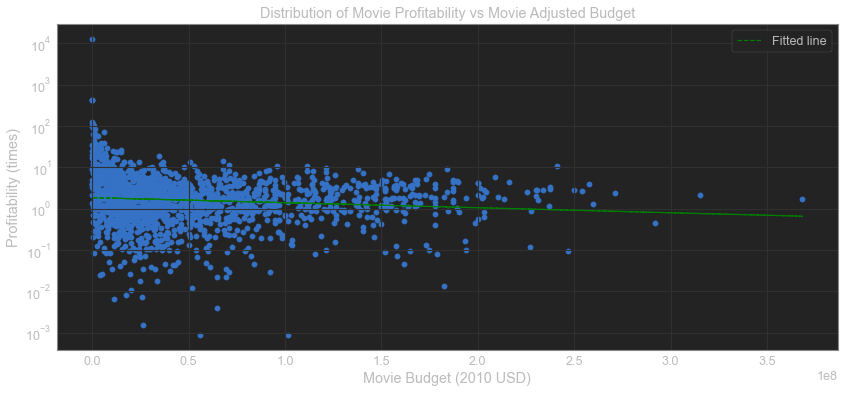

In [46]:
fig = plt.figure(figsize=(14, 6))

ax = plt.subplot(1, 1, 1)

logy_scatter_trend(df_profit_log.query('release_year >= 2000')['budget_adj'], 
                   df_profit_log.query('release_year >= 2000')['profitability'])

ax.set_ylabel('Profitability (times)')
ax.set_xlabel('Movie Budget (2010 USD)')
ax.set_title(
    'Distribution of Movie Profitability vs Movie Adjusted Budget')
ax.legend()

plt.show()

Based on the above scatter plot between a movie's budget and its profitability, NumPy's first-order least squares polynomial fit method identifies a slight negative correlation between budget and profitability - in other words, it appears that the more expensive the movie is, the less profitable it is likely to be.

With the above in mind, the median adjusted budget of each production company is calculated and plotted against the company's average profitability:

In [47]:
# If condition used in case cell is re-run, the column won't be duplicated
if 'median_budget_adj' not in df_top_comp_latest: 
    df_top_comp_med = pd.DataFrame(df_prod_com_latest.groupby(
        'production_companies')['budget_adj'].median())
    df_top_comp_latest = pd.merge(df_top_comp_latest, df_top_comp_med,
                           left_on='production_companies', right_on='production_companies')
    df_top_comp_latest.rename(
        columns={'budget_adj': 'median_budget_adj'}, inplace=True)

df_top_comp_latest

,production_companies,num_of_films,median_profit,median_budget_adj
0,Universal Pictures,151,2.028088,5.024535e+07
1,Warner Bros.,144,1.514062,6.835846e+07
2,Paramount Pictures,107,1.659325,6.814516e+07
3,Columbia Pictures,105,1.740564,6.263419e+07
4,Twentieth Century Fox Film Corporation,99,1.893624,6.076720e+07
...,...,...,...,...
1766,Ministry of Propaganda Films,1,34.860900,4.849046e+04
1767,Mirabai Films,1,0.678236,1.298003e+07
1768,Miracle Pictures,1,1.171429,2.020279e+07
1769,Mirage Studios,1,1.812029,3.575673e+07


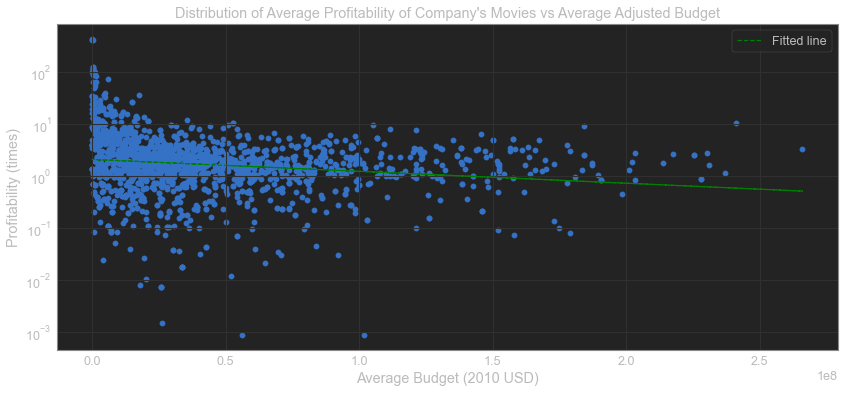

In [48]:
fig = plt.figure(figsize=(14, 6))

ax = plt.subplot(1, 1, 1)

logy_scatter_trend(df_top_comp_latest['median_budget_adj'], df_top_comp_latest['median_profit'])

ax.set_ylabel('Profitability (times)')
ax.set_xlabel('Average Budget (2010 USD)')
ax.set_title(
    'Distribution of Average Profitability of Company\'s Movies vs Average Adjusted Budget')
ax.legend()

plt.show()

In the above plot, a similar pattern to the previous investigation between individual movie and profitability can be seen. This is to be expected as, in the data, a large number of production companies has only produced a single or very few films, and as such a significant amount of data for both sets are identical.

In [49]:
df_top_comp_latest.query('num_of_films < 2').count()

production_companies    1148
num_of_films            1148
median_profit           1148
median_budget_adj       1148
dtype: int64

Thus, we also investigate whether there is any difference in the above trend for more prolific production companies. For the purpose of this analysis, the data is separated into 2 groups: "less prolific" companies which has produced 5 or less films, and "more prolific" companies which have produced more than 5 films:

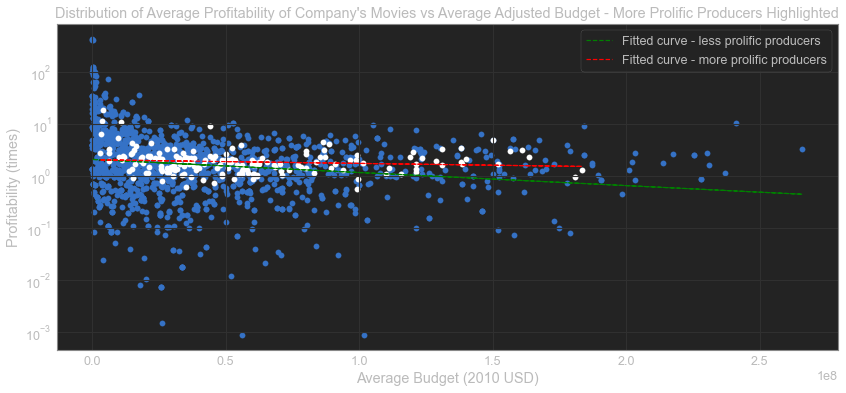

In [50]:
fig = plt.figure(figsize=(14, 6))

ax = plt.subplot(1, 1, 1)

df_less = df_top_comp_latest.query('num_of_films <= 5')
df_more = df_top_comp_latest.query('num_of_films > 5')

logy_scatter_trend(df_less['median_budget_adj'],
                   df_less['median_profit'],
                   label='Fitted curve - less prolific producers')
logy_scatter_trend(df_more['median_budget_adj'],
                   df_more['median_profit'],
                   pointcolor='white', linecolor='red',
                   label='Fitted curve - more prolific producers')

ax.set_ylabel('Profitability (times)')
ax.set_xlabel('Average Budget (2010 USD)')
ax.set_title(
    'Distribution of Average Profitability of Company\'s Movies vs Average Adjusted Budget' +
    ' - More Prolific Producers Highlighted')
ax.legend()

plt.show()

The data points for more prolific companies are highlighted in white. As seen in the plot, there is still a negative correlation between average budget size and profitability, but the correlation is significantly less strong.

This appears to imply that, while higher-budget movies are more likely to achieve less profitability than lower-budget movies, this effect can be mitigated if the movie is produced by a more profilic production company. In other words, a higher-budget movie released by a more prolific producer is more likely to have higher profitability than those released by less prolific producers.

<a id='explore2.4'></a>
#### 2.4 Are certain genres more likely to be profitable than others?

In this investigation, the potential correlation between genre of a film and its profitability is explored for data from 2000 to 2015. The median profitability of each of the film genre is calculated as follows:

In [51]:
df_genres_latest = pd.DataFrame(df_genres.query('release_year >= 2000'))
df_top_genres = num_and_median(df_genres_latest, group='genres')
df_top_genres = df_top_genres.sort_values('median_profit', ascending=False).reset_index(drop=True)
df_top_genres

,genres,num_of_films,median_profit
0,Documentary,22,4.806475
1,Music,55,2.663771
2,Horror,190,2.358815
3,Animation,130,1.924888
4,Romance,294,1.880205
5,Comedy,645,1.857024
6,Mystery,133,1.747807
7,War,46,1.745340
8,Family,239,1.740564
9,Drama,706,1.721363


A boxplot of the profitability distribution of each genre is also generated, ordered by the most to least profitable genres (most profitable at bottom):

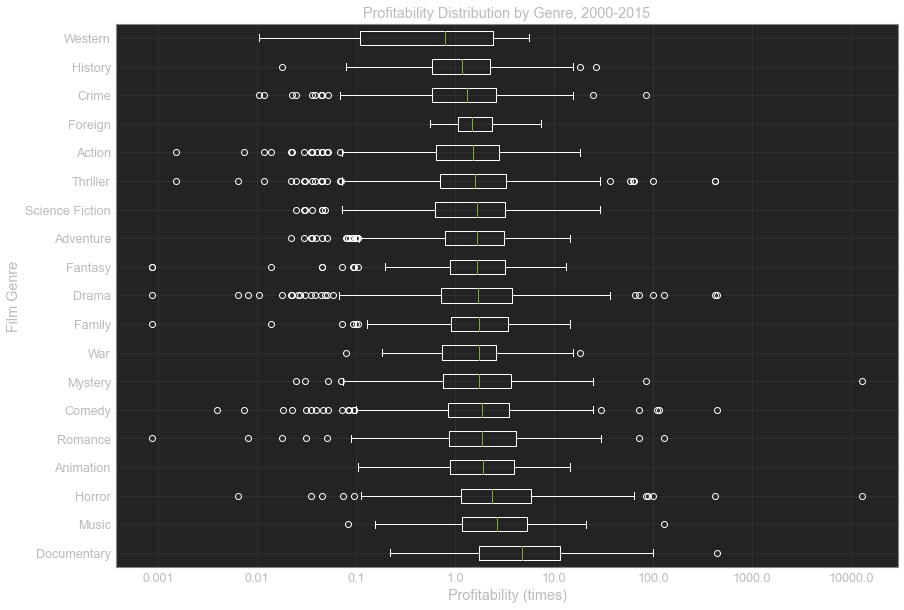

In [52]:
genre_list = df_top_genres['genres']

fig = plt.figure(figsize=(14, 10))

ax = profit_box(df_genres_latest, category='genres', bin_list=genre_list, vert=False)
        
ax.set_xticks(np.arange(-3, 5))
ax.set_xticklabels(10.0**np.arange(-3, 5))
ax.set_yticklabels(genre_list)
ax.set_xlabel('Profitability (times)')
ax.set_ylabel('Film Genre')
ax.set_title('Profitability Distribution by Genre, 2000-2015')

plt.show()

It can be seen that certain genres do tend to be more profitable than others. The top performing genres are Documentary, Music and Horror, while the bottom performing genres are Western, History and Crime.

In the previous section, the a negative correlation was observed between a film's budget size and its profitability. To investigate if this may be related to the observation regarding genre, the distribution of budget sizes in each genre is plotted below, keeping the order of genres by profitability the same as the above plot:

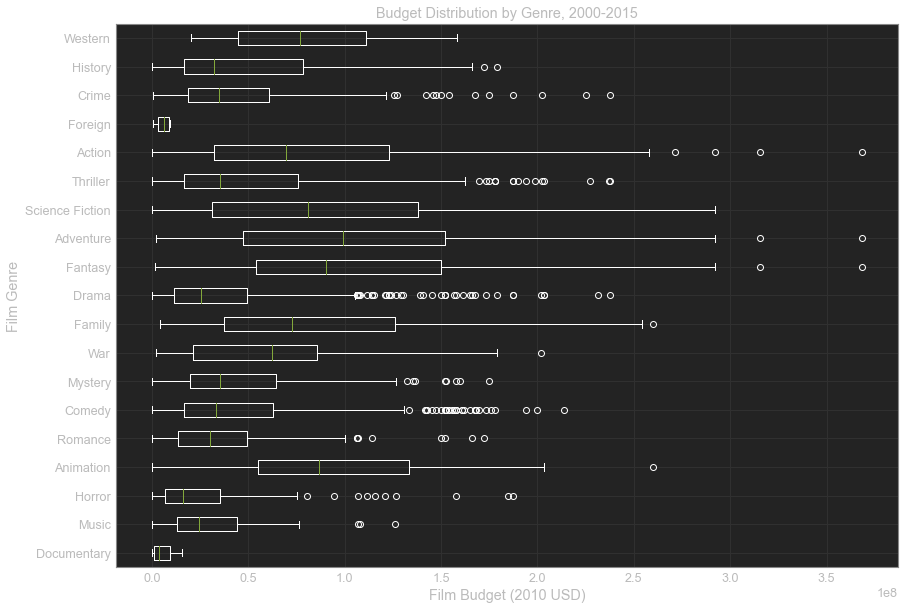

In [53]:
fig = plt.figure(figsize=(14, 10))

ax = profit_box(df_genres_latest, category='genres', categoryb='budget_adj', bin_list=genre_list, vert=False)
        
ax.set_yticklabels(genre_list)
ax.set_xlabel('Film Budget (2010 USD)')
ax.set_ylabel('Film Genre')
ax.set_title('Budget Distribution by Genre, 2000-2015')

plt.show()

It can be seen that while there are no clear correlation, certain pattern could be observed that support the previous observation. For example, the 3 genres with the highest averge profits, namely Documentary, Music and Horror, also have some of the lowest average budgets. However, there are notable exceptions such as the Animation category, which is one of the most profitable genres on average but also has one of the highest average budget.

This seems to suggest that, while the previously observed correlation between budget and profitability may explain some of the observations made when analysing genre against profitability, there are also other factors at play that affect each genre's average profitability.

It was also observed previously that, especially for larger-budget films, the prolificness of the company releasing the films has a positive effect on the profitability of a film. In the next part, we explore whether each genre are generally favoured by more prolific or less prolific companies, in order to see whether this could be the explanation for the above results.

In [54]:
# Create DataFrame where both genres and production_companies columns are exploded

df_genres_latest['production_companies_spt'] = df_genres_latest['production_companies'].str.split(
    pat='|')
df_genres_prod_com = df_genres_latest.explode('production_companies_spt')

df_genres_prod_com = pd.merge(df_genres_prod_com,
                              df_top_comp_latest[[
                                  'production_companies', 'num_of_films']],
                              left_on='production_companies_spt', right_on='production_companies')

In order to separate more prolific and less prolific companies, the previously used criteria of having produced more than 5 films is applied:

(For abbrevity, more prolific companies will be referred to as "Large" and less prolific companies will be referred to as "Small")

In [55]:
com_size_bin_edges = [1, 5, 999]
com_size_bin_names = ['Small', 'Large']
df_genres_prod_com['com_size'] = pd.cut(
    df_genres_prod_com['num_of_films'], com_size_bin_edges, labels=com_size_bin_names)
df_genres_prod_com.groupby('com_size').count()['profitability']

com_size
Small    3319
Large    8326
Name: profitability, dtype: int64

In [56]:
# Count the numbers of Large and Small companies involved in producing films of each genre
small_count = df_genres_prod_com[df_genres_prod_com['com_size'] == 'Small'].groupby(
    'genres')['com_size'].count()
large_count = df_genres_prod_com[df_genres_prod_com['com_size'] == 'Large'].groupby(
    'genres')['com_size'].count()

# If condition used so columns not duplicated if cell is re-run
if 'small_count' not in df_top_genres.columns:
    df_top_genres = pd.merge(df_top_genres, small_count, on='genres')
    df_top_genres.rename(columns={'com_size': 'small_count'}, inplace=True)
    df_top_genres = pd.merge(df_top_genres, large_count, on='genres')
    df_top_genres.rename(columns={'com_size': 'large_count'}, inplace=True)

# Take percentage in order to plot a percentage stacked bar chart
df_top_genres['small_%'] = df_top_genres['small_count'] / \
    (df_top_genres['small_count'] + df_top_genres['large_count'])
df_top_genres['large_%'] = df_top_genres['large_count'] / \
    (df_top_genres['small_count'] + df_top_genres['large_count'])
df_top_genres.head()

,genres,num_of_films,median_profit,small_count,large_count,small_%,large_%
0,Documentary,22,4.806475,10,10,0.500000,0.500000
1,Music,55,2.663771,32,84,0.275862,0.724138
2,Horror,190,2.358815,149,322,0.316348,0.683652
3,Animation,130,1.924888,72,204,0.260870,0.739130
4,Romance,294,1.880205,188,433,0.302738,0.697262


A stacked bar chart for the proportion of Small and Large producers for each genre is generated, along with an average line to visualise which genres are skewed towards Small or Large producers:

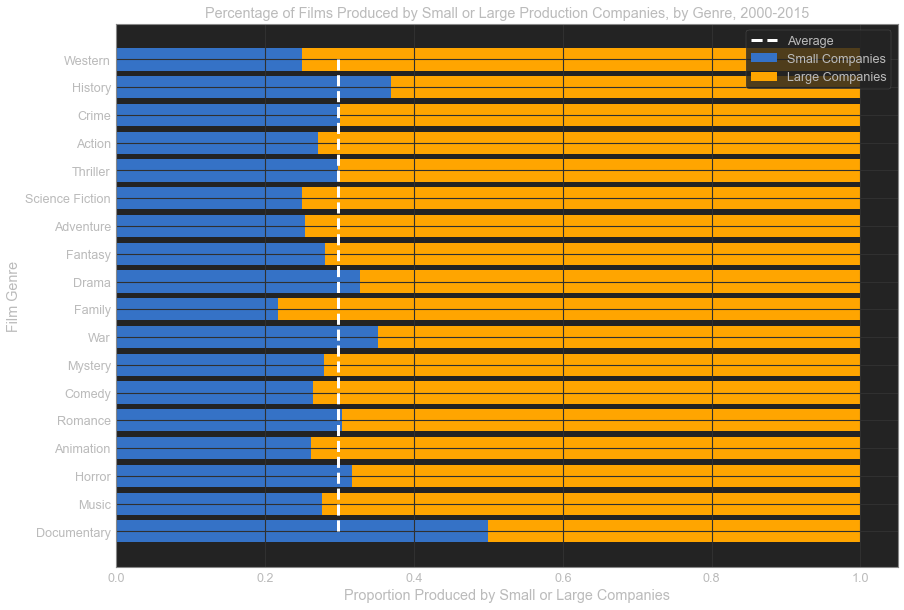

In [57]:
fig = plt.figure(figsize=(14, 10))

labels = df_top_genres['genres']
small_bar = df_top_genres['small_%']
large_bar = df_top_genres['large_%']

ax = plt.subplot(1, 1, 1)
ax.barh(labels, small_bar, label='Small Companies')
ax.barh(labels, large_bar, left=small_bar, label='Large Companies', color='orange')

ax.plot(np.full(18, small_bar.mean()), np.arange(0, 18),
        color='white', label='Average', linewidth=3, linestyle='--')

ax.set_xlabel('Proportion Produced by Small or Large Companies')
ax.set_ylabel('Film Genre')
ax.set_title(
    'Percentage of Films Produced by Small or Large Production Companies, by Genre, 2000-2015')
ax.legend()

plt.show()

Based on the above, we can see that certain genres skew towards being produced by Small producers and vice versa. Genres that skew significantly towards Small producers include Documentary, Horror, War, Drama and History. Genres that skew significantly towards Large producers include Music, Animation, Comedy, Mystery, Family, Fantasy, Adventure, Science Fiction, Action and Western.

Looking back at the "Budget Distribution by Genre, 2000-2015" chart, some of these observations may explain the discrepancy in the relationship between genre average budget size and its profitability. 

For example, the Animation category has high profitability despite having high average budget. However, we can see that the Animation category is favoured by large producers. This may be explained by the observation from part 2.3 that higher budget movies produced by Large producers tend to generate more profit.

Inversely, the Drama and History genres have low average profitability despite having low average budget. This may also be related the both genres being favoured by Small production companies.

As such, should the relationship observed in 2.2, 2.3 and 2.4 be statistically significant, genres could be dismissed as a predictor of profitability in favour of budget and producer's prolificness.

<a id='explore2.5'></a>
#### 2.5 Is there a relationship between a movie's budget size and its production company's prolificness?

As a final check on the variables explored, a scatter plot is generated below to explore whether there is any observable relationship between the budget size of a movie and its production company's prolificness (in other words, do more prolific production companies produce higher or lower budget films on average?).

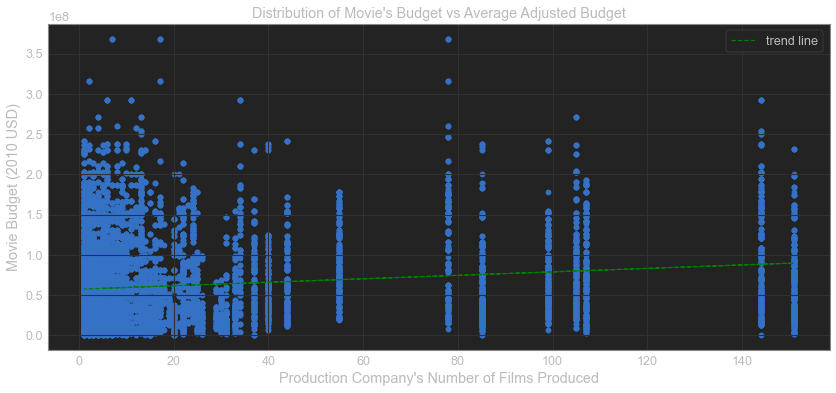

In [58]:
fig = plt.figure(figsize=(14, 6))

ax = plt.subplot(1, 1, 1)

x = df_genres_prod_com['num_of_films']
y = df_genres_prod_com['budget_adj']
ax.scatter(x, y)

p = np.poly1d(np.polyfit(x, y, 1))
plt.plot(x, p(x), color='green', linestyle='dashed', label='trend line')

ax.set_ylabel('Movie Budget (2010 USD)')
ax.set_xlabel('Production Company\'s Number of Films Produced')
ax.set_title(
    'Distribution of Movie\'s Budget vs Average Adjusted Budget')
ax.legend()

plt.show()

Based on the above chart and the estimated trend line, it appears that there is a positive trend - meaning that more prolific production companies are correlated positively with higher budget movies.

This cannot be explained based only on the observations in part 2.2 that more prolific production companies tend to have higher average profitability and in part 2.3 that lower-budget films tend to have higher profitability. 

Thus, this seems to indicate that profitability of a movie may be partly explained by a function of _both_ budget size and the prolificness of the company(ies) that produces it.

<a id='conclusions'></a>
## Conclusions

In this project, the trends and potential relationships of profitability as the dependent variable and several "independent" variables, including prolificness of a movie's production companies, budgets and genres, have been explored. The explorations are done using simple statistics including median and quartile ranges, and relying on visual inspection of plotted graphs and comparison of average values. As statistical tests have not been performed as part of this project, this conclusion does not infer any statistical significance to the relationships.

From the exploration of decade-by-decade data from 1960 to 2015, we found that the top 10 production companies do not appear to perform better than the overall industry average consistently. However, looking at the latest data from 2000 to 2015, there appears to be a slight positive relationship between how prolific a company is to the average profitability of the movies it produce.

Furthermore, a negative correlation is observed between the budget of a movie and its profitability. However; this relationship seems to weaken when based on how prolific the company that produces the movie is.

It is also observed that certain genres of films perform better on average in terms of profitability than others. By further exploring this relationship, this seems to be in part explained by the fact that certain genres of movies have on average higher or lower budget than others, and that some genres are more favoured by more prolific companies than others.

In conclusion, based on the observations made in this project, there is a case to be made that the profitability of a movie could be predicted, in part, with a function of 1) the budget of a film and 2) the prolificness of its production company(ies).

It should be noted that during the cleaning process, a significant amount of data were found to contain errorneous entry which affected the data pool used in the study. The project could be further improved if more reliable data could be obtained. 

Some errorneous entries may also not have been detected in the cleaning phase. Additionally, statistical tests could be applied to determine the significance of the relationships observed in this project, but it is beyond the scope of the project for now.

Apart from errorneous entries ther potential issues in the data that could have affected the findings include:
- The availability monetary data (budget and revenue) are based on public reports, and many films' data are not reported. This reduces the universe of available data and may skew the data towards over-representation of bigger, more prominent films which are more likely to be reported
- The reliability of monetary data. The budget values of films may be accounted differently by different companies, or accounting standards may have changed over time. The revenue data may not be the most updated data and may have been accounted differently for different films. Additionally, the revenue of each film may not capture the actual revenue associated with the film, such as revenue from home release, licensing, merchandise sales, etc. The latter may undervalue revenue of certain films significantly, such as large recognisable franchises which receive significant revenue from merchandise sales, or cult classic movies that make a lot of revenues on non-theatrical releases
- Subjectivity in the entry of qualitative data. The key qualitative data used in this study was genres, which could have been determined based on different criteria for different films due to subjectivity of the contributors